In [4]:
import pickle
import datetime as dt
import env_methods as em
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import csv

In [5]:
with open("Maxima result", 'rb') as f:
        miss_data = pickle.load(f)

In [26]:
def n_year_window_flood(cutoff_timedelta, data, datakey, lat, lon, start_day, end_day, flood_cutoff):
    lat_i = em.find_closest_val(lat, data["lat"])
    lon_i = em.find_closest_val(lon, data["lon"])
    time = start_day
    
    result = dict()
    result["time"] = []
    result["count"] = []
    
    while time + cutoff_timedelta <= end_day:
        count = 0
        for flood in data[datakey][lat_i][lon_i][:flood_cutoff]:
            if flood[1] >= time and flood[1] <= time + cutoff_timedelta:
                count += 1
        
        result["time"].append(time)
        result["count"].append(count)
        
        time = time + relativedelta(months = 1)
    
    return result
    

In [27]:
def n_year_window_flood_mapping(cutoff_timedelta, data, datakey, start_day, end_day, flood_cutoff):
    result = dict()
    result["lon"] = data["lon"]
    result["lat"] = data["lat"]
    result["count"] = []
    
    for lat in data["lat"]:
        print("starting on latitude " + str(lat))
        row = []
        for lon in data["lon"]:
            row.append(n_year_window_flood(cutoff_timedelta, data, datakey, lat, lon, start_day, end_day, flood_cutoff))
            
        result["count"].append(row)
    
    return result

In [ ]:
series = n_year_window_flood_mapping(relativedelta(years = 11), miss_data, "maxima", time1, dt.datetime(2019, 9, 30), 10)

file = open("Time series result", "wb")
pickle.dump(series, file)
file.close()

starting on latitude 50.35
starting on latitude 50.25
starting on latitude 50.15
starting on latitude 50.05
starting on latitude 49.95
starting on latitude 49.85
starting on latitude 49.75
starting on latitude 49.65
starting on latitude 49.55
starting on latitude 49.45
starting on latitude 49.35
starting on latitude 49.25
starting on latitude 49.15
starting on latitude 49.05
starting on latitude 48.95
starting on latitude 48.85
starting on latitude 48.75
starting on latitude 48.65
starting on latitude 48.55
starting on latitude 48.45
starting on latitude 48.35
starting on latitude 48.25
starting on latitude 48.15
starting on latitude 48.05
starting on latitude 47.95
starting on latitude 47.85
starting on latitude 47.75
starting on latitude 47.65
starting on latitude 47.55
starting on latitude 47.45
starting on latitude 47.35
starting on latitude 47.25
starting on latitude 47.15
starting on latitude 47.05
starting on latitude 46.95
starting on latitude 46.85


In [24]:
lat_i = em.find_closest_val(38.118330, miss_data["lat"])
lon_i = em.find_closest_val(-86.461021, miss_data["lon"])
miss_data["maxima"][lat_i][lon_i][:10]

[(15254.991, datetime.datetime(2004, 9, 20, 0, 0)),
 (15113.583, datetime.datetime(1984, 5, 10, 0, 0)),
 (13838.68, datetime.datetime(1996, 5, 30, 0, 0)),
 (13286.895, datetime.datetime(2019, 2, 27, 0, 0)),
 (12490.725, datetime.datetime(1994, 3, 30, 0, 0)),
 (10635.397, datetime.datetime(1997, 3, 5, 0, 0)),
 (10505.17, datetime.datetime(2002, 5, 15, 0, 0)),
 (10234.128, datetime.datetime(2018, 4, 19, 0, 0)),
 (10228.675, datetime.datetime(2008, 4, 6, 0, 0)),
 (9595.013, datetime.datetime(1991, 1, 2, 0, 0))]

In [18]:
series

{'time': [datetime.datetime(1979, 10, 1, 0, 0),
  datetime.datetime(1979, 11, 1, 0, 0),
  datetime.datetime(1979, 12, 1, 0, 0),
  datetime.datetime(1980, 1, 1, 0, 0),
  datetime.datetime(1980, 2, 1, 0, 0),
  datetime.datetime(1980, 3, 1, 0, 0),
  datetime.datetime(1980, 4, 1, 0, 0),
  datetime.datetime(1980, 5, 1, 0, 0),
  datetime.datetime(1980, 6, 1, 0, 0),
  datetime.datetime(1980, 7, 1, 0, 0),
  datetime.datetime(1980, 8, 1, 0, 0),
  datetime.datetime(1980, 9, 1, 0, 0),
  datetime.datetime(1980, 10, 1, 0, 0),
  datetime.datetime(1980, 11, 1, 0, 0),
  datetime.datetime(1980, 12, 1, 0, 0),
  datetime.datetime(1981, 1, 1, 0, 0),
  datetime.datetime(1981, 2, 1, 0, 0),
  datetime.datetime(1981, 3, 1, 0, 0),
  datetime.datetime(1981, 4, 1, 0, 0),
  datetime.datetime(1981, 5, 1, 0, 0),
  datetime.datetime(1981, 6, 1, 0, 0),
  datetime.datetime(1981, 7, 1, 0, 0),
  datetime.datetime(1981, 8, 1, 0, 0),
  datetime.datetime(1981, 9, 1, 0, 0),
  datetime.datetime(1981, 10, 1, 0, 0),
  datetime

In [12]:
def plot_tseries(data, datakey, title, x_title, y_title):
    fig = plt.figure(figsize = (20, 10))
    plt.plot(data[0], data[1])
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.grid()

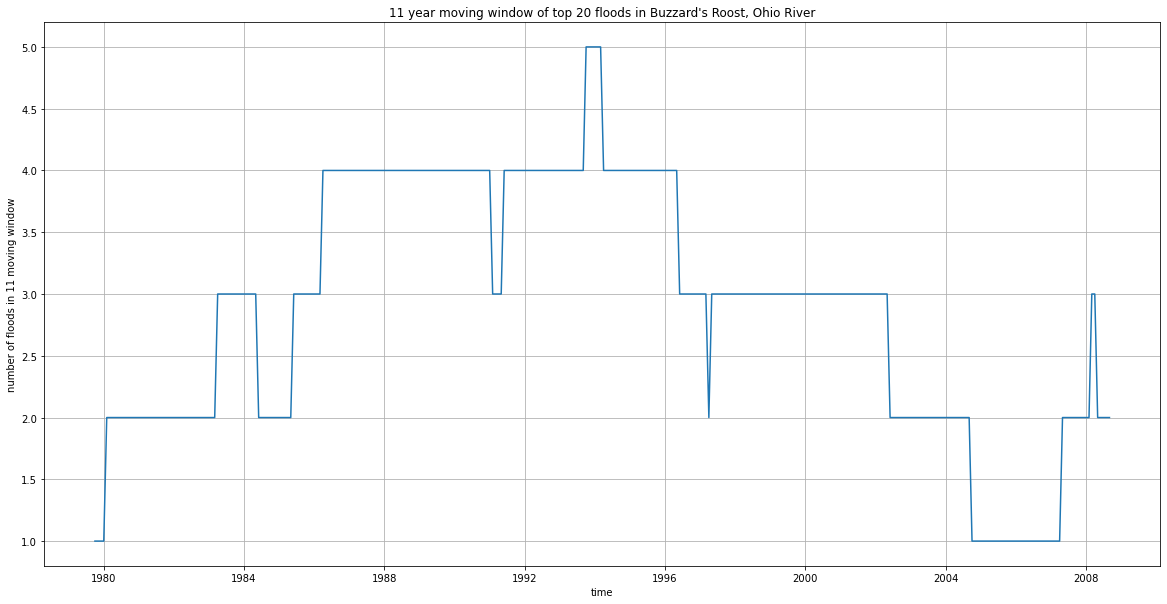

In [13]:
plot_tseries(series, "blah", "11 year moving window of top 20 floods in Buzzard's Roost, Ohio River", "time", "number of floods in 11 moving window")

In [14]:
#Smooth PDO w/ 120 month (10 year) rolling average
#AMO maybe? Smooth w/ 120 month rolling average

#Pearson correlation with both